In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML/Data Visualization/Data-Preparation-and-Visualization/8.ML-LinearRegression/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

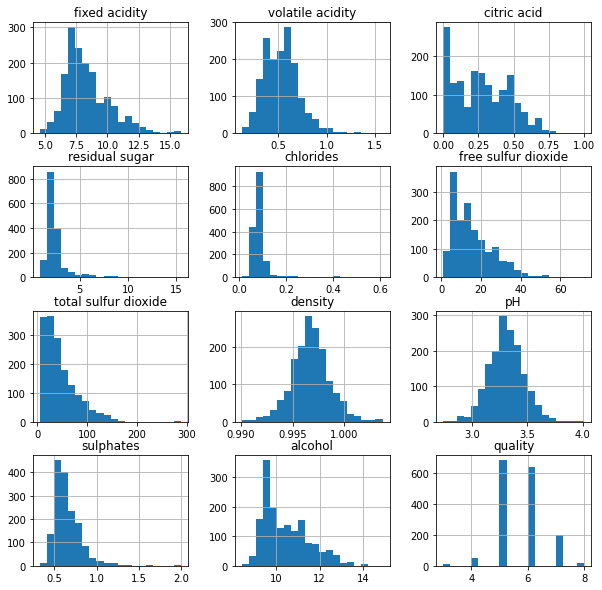

In [6]:
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize= (10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


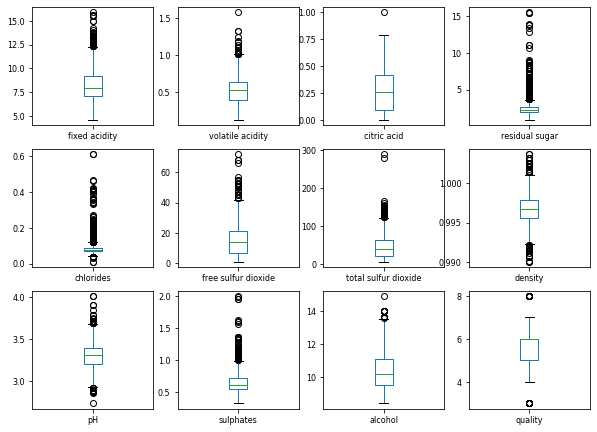

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [11]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


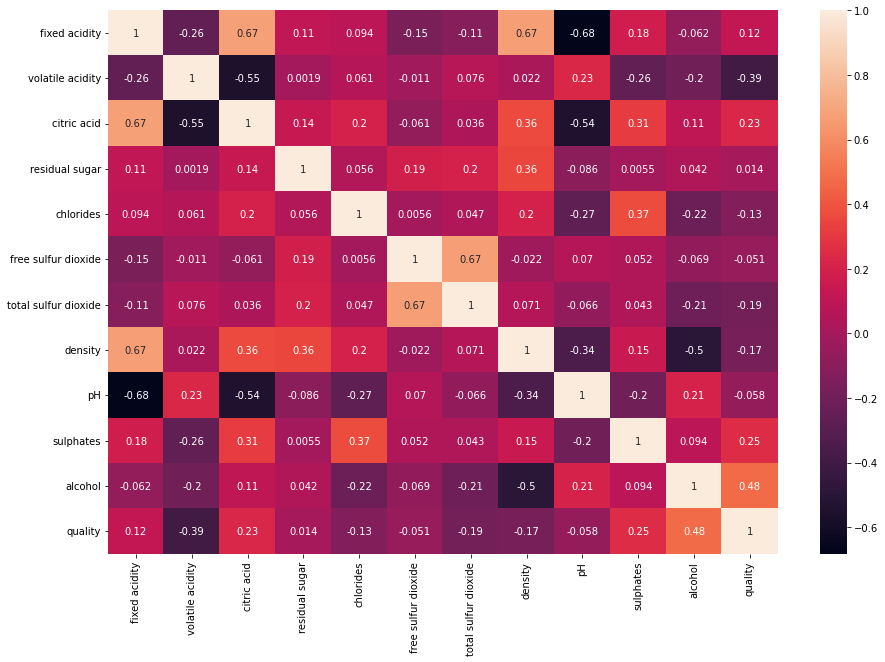

In [13]:
import seaborn
plt.figure(figsize=[15,10])
seaborn.heatmap(df.corr(),annot=True)

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Category

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

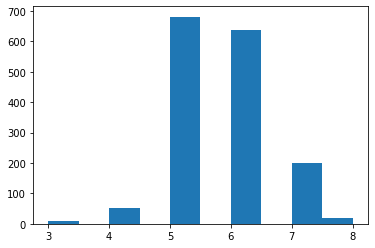

In [15]:
plt.hist(df['quality'])

In [16]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
del df['quality']

In [17]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Corr

In [54]:
data = df.copy()

In [41]:
corr_matrix = df.corr().abs()

In [42]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [43]:
upper

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
fixed acidity,NaN,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.120061
volatile acidity,NaN,NaN,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.270712
citric acid,NaN,NaN,NaN,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.214716
residual sugar,NaN,NaN,NaN,NaN,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.047779
chlorides,NaN,NaN,NaN,NaN,NaN,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.097308
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.667666,0.021946,0.070377,0.051658,0.069408,0.071747
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071269,0.066495,0.042947,0.205654,0.139517
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341699,0.148506,0.496180,0.150460
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196648,0.205633,0.057283
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093595,0.199485


In [55]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] < 0.05)]

to_drop

['residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol',
 'goodquality']

In [56]:
to_drop.remove('goodquality')
to_drop

['residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'sulphates',
 'alcohol']

In [57]:
# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [58]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'pH',
       'goodquality'],
      dtype='object')

## Outlier

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


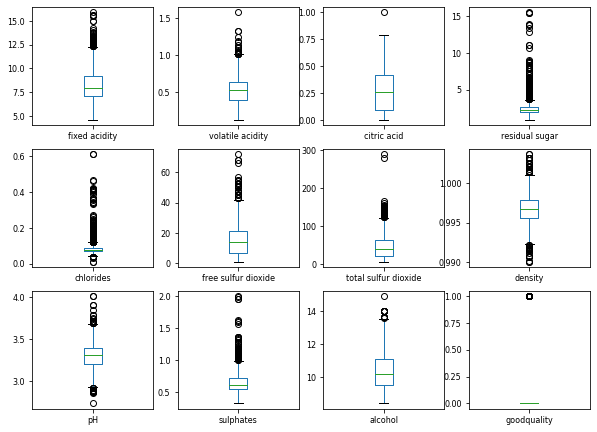

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [61]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
dat = lof.fit_predict(data)
# select all rows that are not outliers
mask = dat != -1
data = data[mask]

In [62]:
len(df), len(data)

(1599, 1532)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


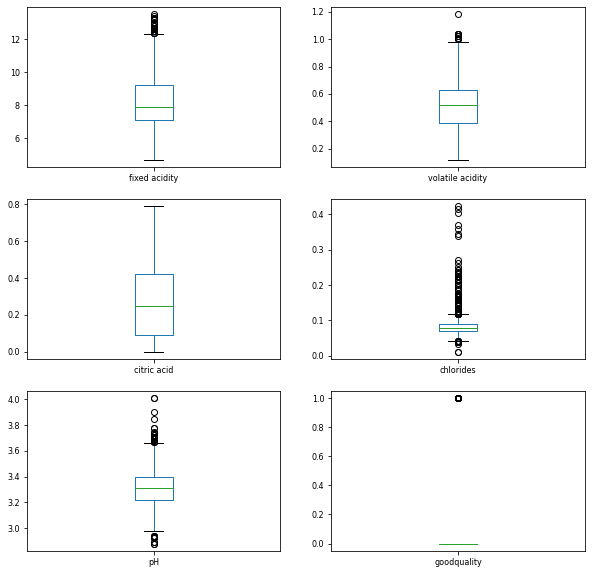

In [65]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

In [66]:
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,pH,goodquality
0,7.4,0.70,0.00,0.076,3.51,0
1,7.8,0.88,0.00,0.098,3.20,0
2,7.8,0.76,0.04,0.092,3.26,0
3,11.2,0.28,0.56,0.075,3.16,0
4,7.4,0.70,0.00,0.076,3.51,0


# Linear Regression

In [81]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def LinearRegression_(X, y):
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)
  y_train = sc.fit_transform(y_train.reshape(-1,1))
  y_test = sc.fit_transform(y_test.reshape(-1,1))
  regressor = LinearRegression()
  regressor.fit(X_train, y_train)
  print("Test ",mean_squared_error(y_test, regressor.predict(X_test)))
  print("Train ", mean_squared_error(y_train, regressor.predict(X_train)))

In [69]:
LinearRegression_(X, y)

Test  0.9148329425721785
Train  0.901540975363305


## KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [82]:
sc = StandardScaler()
X = sc.fit_transform(X)
# y = sc.fit_transform(y.reshape(-1,1))

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, y_train

(array([[-0.2875388 ,  1.28051139, -0.97648849,  0.24863124, -0.52172297],
        [ 0.43967447,  0.83127088, -0.50088627, -0.21351759, -0.18183541],
        [-0.65114543,  0.80132151, -1.24071195, -0.18270766,  0.15805215],
        ...,
        [ 0.68207889, -0.75604558,  1.03160978,  0.31025109, -0.31779043],
        [-1.3783587 , -0.60629874, -0.39519689, -0.27513743,  0.49793972],
        [-0.89354985,  0.83127088, -1.02933318, -0.42918704, -0.18183541]]),
 array([0, 0, 0, ..., 1, 0, 0]))

In [110]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[253  15]
 [ 33   6]]


0.8436482084690554

###Hyperparameter Tuning

In [91]:
from sklearn.model_selection import cross_val_score
# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the 10 folds that's why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.85714286 0.83766234 0.79738562 0.76470588 0.8627451  0.84313725
 0.8627451  0.82352941 0.83660131 0.82352941]


In [92]:
k_range = range(1, 10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.8490403838464614, 0.859656137544982, 0.8408569905371184, 0.8596228175396508, 0.846588031454085, 0.8481940557110489, 0.8375982940157272, 0.853911768625883, 0.8474010395841663]


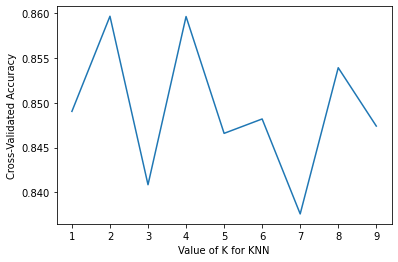

In [94]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

#### GridSearchCV

In [97]:
param_grid = dict(n_neighbors=k_range)
param_grid

{'n_neighbors': range(1, 10)}

In [98]:
from sklearn.model_selection import GridSearchCV
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, param_grid, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)

In [99]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 2
Best n_neighbors: 2


In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_ = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_)
print(cm)
accuracy_score(y_test, y_pred_)

[[255  13]
 [ 34   5]]


0.8469055374592834

## SVM

In [112]:
#Without Hyper Parameters Tuning
#importing module
from sklearn import svm
#making the instance
model_svm = svm.SVC(random_state=42)
#learning
model_svm.fit(X_train,y_train)
#Prediction
prediction=model_svm.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8729641693811075
Confusion Metrix:
 [[268  39]
 [  0   0]]


### Hyperparameter Tuning

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#making the instance
svm_c =svm.SVC()
#Hyper Parameters Set
params = {'C': [1,2,3,4,5,6,7,8,9], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
svm_tuning = GridSearchCV(svm_c, param_grid=params, n_jobs=-1)

In [121]:
svm_tuning.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",svm_tuning.best_params_)
#Prediction
prediction=svm_tuning.predict(X_test)

Best Hyper Parameters:
 {'C': 2, 'kernel': 'rbf'}


In [122]:
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8729641693811075
Confusion Metrix:
 [[268  39]
 [  0   0]]
